In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Set sample size — large like FAANG (100K+ per group)
n = 100_000   

control = pd.DataFrame({
    "user_id": range(1, n+1),
    "group": "A",
    "clicked": np.random.binomial(1, 0.11, n),       # CTR ~ 11%
    "converted": np.random.binomial(1, 0.032, n),    # CVR ~ 3.2%
})

variant = pd.DataFrame({
    "user_id": range(n+1, 2*n+1),
    "group": "B",
    "clicked": np.random.binomial(1, 0.14, n),       # CTR ~ 14%
    "converted": np.random.binomial(1, 0.040, n),    # CVR ~ 4.0%
})

df = pd.concat([control, variant], ignore_index=True)

df.to_csv("ab_test_data.csv", index=False)
df.head()


,user_id,group,clicked,converted
0,1,A,0,0
1,2,A,1,0
2,3,A,0,0
3,4,A,0,0
4,5,A,0,0


In [2]:
group_stats = df.groupby("group").agg(
    impressions=("clicked", "count"),
    clicks=("clicked", "sum"),
    conversions=("converted", "sum")
)

group_stats["ctr"] = group_stats["clicks"] / group_stats["impressions"]
group_stats["cvr"] = group_stats["conversions"] / group_stats["impressions"]

group_stats


,impressions,clicks,conversions,ctr,cvr
group,,,,,
A,100000,10826,3276,0.10826,0.03276
B,100000,14052,3905,0.14052,0.03905


In [3]:
from statsmodels.stats.proportion import proportions_ztest

# CTR test
clicks = [group_stats.loc['A','clicks'], group_stats.loc['B','clicks']]
impressions = [group_stats.loc['A','impressions'], group_stats.loc['B','impressions']]

z_stat, p_value = proportions_ztest(clicks, impressions)
print("CTR Z-Score:", z_stat)
print("CTR p-value:", p_value)


ModuleNotFoundError: No module named 'statsmodels'

In [4]:
from statsmodels.stats.proportion import proportions_ztest

# CTR Test (clicks out of impressions)
clicks = [10826, 14052]
impressions = [100000, 100000]

z_ctr, p_ctr = proportions_ztest(clicks, impressions)
print("CTR Z-statistic:", z_ctr)
print("CTR p-value:", p_ctr)


ModuleNotFoundError: No module named 'statsmodels'

In [5]:
pip install statsmodels


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -------------------------------

In [6]:
from statsmodels.stats.proportion import proportions_ztest

# CTR Test
clicks = [10826, 14052]
impressions = [100000, 100000]

z_ctr, p_ctr = proportions_ztest(clicks, impressions)
print("CTR Z-statistic:", z_ctr)
print("CTR p-value:", p_ctr)


# CVR Test
conversions = [3276, 3905]

z_cvr, p_cvr = proportions_ztest(conversions, impressions)
print("CVR Z-statistic:", z_cvr)
print("CVR p-value:", p_cvr)


CTR Z-statistic: -21.85753965077769
CTR p-value: 6.590178874874003e-106
CVR Z-statistic: -7.559590434550596
CVR p-value: 4.043404886791208e-14


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Observed conversions
conv_A, total_A = 3276, 100000
conv_B, total_B = 3905, 100000

# Priors (non-informative)
alpha0, beta0 = 1, 1

# Posterior params
post_A = beta(alpha0 + conv_A, beta0 + (total_A - conv_A))
post_B = beta(alpha0 + conv_B, beta0 + (total_B - conv_B))

# Simulate samples
samples_A = post_A.rvs(200000)
samples_B = post_B.rvs(200000)

# Probability that Variant B > A
probability_B_better = np.mean(samples_B > samples_A)

probability_B_better


np.float64(1.0)

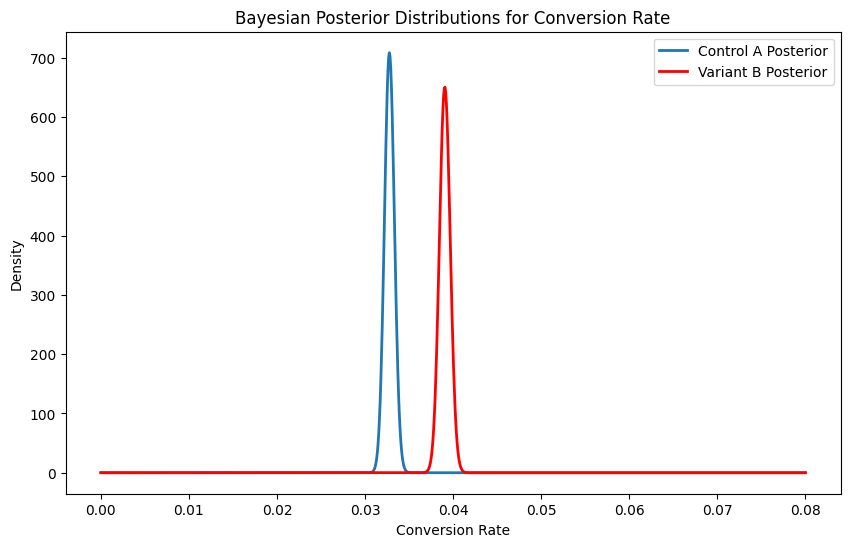

In [8]:
plt.figure(figsize=(10,6))
x = np.linspace(0, 0.08, 1000)

plt.plot(x, post_A.pdf(x), label="Control A Posterior", lw=2)
plt.plot(x, post_B.pdf(x), label="Variant B Posterior", lw=2, color="red")

plt.title("Bayesian Posterior Distributions for Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.show()


In [1]:
plt.savefig("beta_posterior_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'plt' is not defined

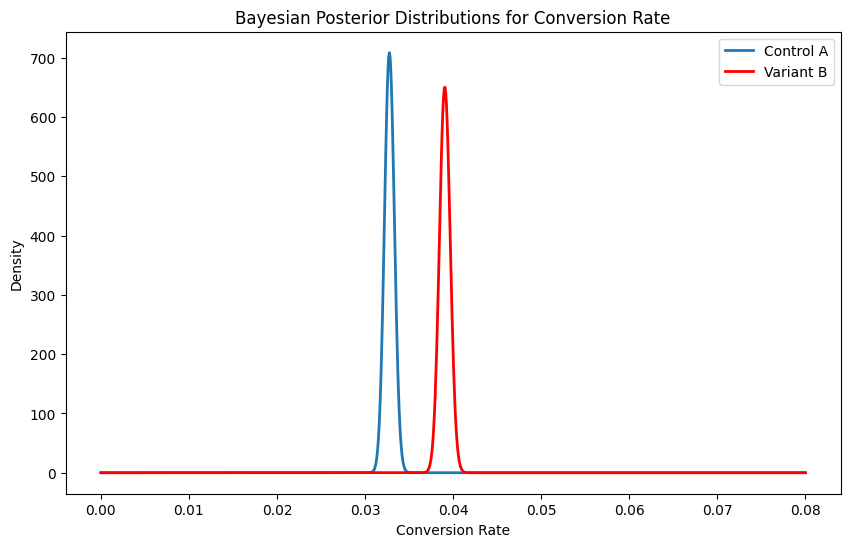

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Observed conversions
conv_A, total_A = 3276, 100000
conv_B, total_B = 3905, 100000

# Priors (uninformative)
alpha0, beta0 = 1, 1

# Posterior definitions
post_A = beta(alpha0 + conv_A, beta0 + (total_A - conv_A))
post_B = beta(alpha0 + conv_B, beta0 + (total_B - conv_B))

# Plot
x = np.linspace(0, 0.08, 1000)
plt.figure(figsize=(10,6))
plt.plot(x, post_A.pdf(x), label="Control A", lw=2)
plt.plot(x, post_B.pdf(x), label="Variant B", lw=2, color="red")

plt.title("Bayesian Posterior Distributions for Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()

# 🔥 Save image for Power BI dashboard
plt.savefig("beta_posterior_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
